<a href="https://colab.research.google.com/github/matician255/LeNet-5-model/blob/main/Lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8518 - loss: 0.5229 - val_accuracy: 0.9580 - val_loss: 0.1371
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9637 - loss: 0.1203 - val_accuracy: 0.9744 - val_loss: 0.0839
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9770 - loss: 0.0769 - val_accuracy: 0.9762 - val_loss: 0.0734
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 0.9784 - val_loss: 0.0675
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.9827 - val_loss: 0.0535
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9888 - loss: 0.0345 - val_accuracy: 0.9816 - val_loss: 0.0536
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9831 - val_loss: 0.0558
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9910 - loss: 0.0295 - 

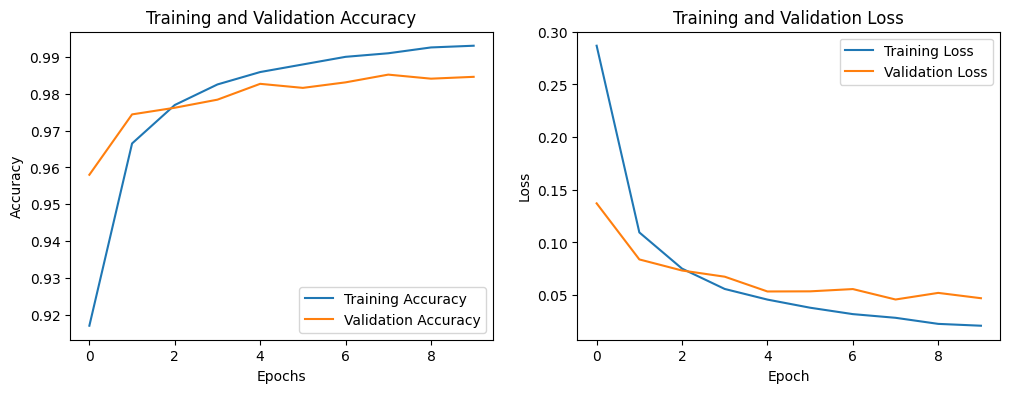

313/313 - 2s - 5ms/step - accuracy: 0.9846 - loss: 0.0471

Test accuracy: 0.9846


In [3]:
#loading and preprocess the MNIST dataset

def load_and_preprocess_data():
  (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

  #reshape and normalize the images
  train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
  test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

  # One-hot encode the labels
  train_labels = tf.keras.utils.to_categorical(train_labels)
  test_labels = tf.keras.utils.to_categorical(test_labels)

  return train_images, train_labels, test_images, test_labels


# Build the LeNet-5 model

def build_lenet5():
  model = models.Sequential([
      # Layer 1: convolutional layer with 6 filters, 5x5 kernel, and tanh activation
      layers.Conv2D(6, (5,5), activation='tanh', input_shape=(28,28,1)),
      layers.AveragePooling2D((2,2)), # Subsampling layer

      # Layer 2: Convolutional layer with 16 filters, 5x5 kernel, and tanh activation
      layers.Conv2D(16, (5,5), activation='tanh'),
      layers.AveragePooling2D((2,2)), #Subsampling layer

      #Flattent he output for the fully connected layers
      layers.Flatten(),

      #layer 3: Fully connected layer with 120 unitsand tanh activation
      layers.Dense(120, activation='tanh'),

      # Layer 4: Fully connected layer with 84 units and tanh activation
      layers.Dense(84, activation='tanh'),

      # Layers 5: output fully conncted layer with 10 units one for each class with softmax output
      layers.Dense(10, activation='softmax')

  ])

  return model


# compile and train the model

def train_model(model, train_images, train_labels, test_images, test_labels):
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                      validation_data=(test_images, test_labels))
  return history


# Plot training and validation accuracy/loss

def plot_results(history):
  plt.figure(figsize=(12,4))

  #plot accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  #plot loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()


# Main function

def main():
  #Load and preprocess the data
  train_images, train_labels, test_images, test_labels = load_and_preprocess_data()

  #Buld the LeNet-5 model
  model = build_lenet5()
  model.summary() # print the model summary

  #Train the model
  history = train_model(model, train_images, train_labels, test_images, test_labels)

  #Plot the results
  plot_results(history)

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
  print(f"\nTest accuracy: {test_acc:.4f}")

if __name__ == "__main__":
  main()


